# Benchmarking OpenBLAS

13 de Febrero 2019

_Jorge III Altamirano Astorga - CU: 175904_

_Eduardo Selim Martinez Mayorga - CU: 175921_

_Ariel Ernesto Vallarino Maritorena - CU: 175875_


## OpenBLAS

Confirmamos que numpy esté ligado a una compilación de BLAS/MKL.

In [1]:
import numpy as np
np.__config__.show()

mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/opt/intel/intelpython3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/opt/intel/intelpython3/include']
blas_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/opt/intel/intelpython3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/opt/intel/intelpython3/include']
blas_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/opt/intel/intelpython3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/opt/intel/intelpython3/include']
lapack_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/opt/intel/intelpython3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/opt/intel/intelpython3/include']
lapack_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/opt/intel/intelpython3/lib

## Ejecución de Benchmark

In [38]:
#!/usr/bin/env python3
# -*- coding: UTF-8 -*-

# Basado en http://stackoverflow.com/questions/11443302/compiling-numpy-with-openblas-integration

import numpy as np
from time import time

print("==========================================================================")
print("Valores de la configuracion OpenBLAS")
np.__config__.show()
print("========================================================================\n")

# Establecer la semilla con fines de reproducibilidad
np.random.seed(0)

# Tamaño d ela matriz
size = 4096
# Declaracion de las matrices
A, B = np.random.random((size, size)), np.random.random((size, size))
C, D = np.random.random((size * 128,)), np.random.random((size * 128,))
E = np.random.random((int(size / 2), int(size / 4)))
F = np.random.random((int(size / 2), int(size / 2)))
#Producto punto
F = np.dot(F, F.T)
G = np.random.random((int(size / 2), int(size / 2)))

# Multiplicacion de matriz 20 veces (N) para sacar un promedio.
N = 20
t = time()
for i in range(N):
    np.dot(A, B)
delta = time() - t
print('Producto punto de 2 matrices %dx%d tomo %0.2f segundos en promedio. ' % (size, size, delta / N))
del A, B

# Multiplicacion de vectores 5000 Veces para sacar un promedio.
N = 5000
t = time()
for i in range(N):
    np.dot(C, D)
delta = time() - t
print('Producto punto de 2 vectores de longitud %d tomo %0.2f ms en promedio.' % (size * 128, 1e3 * delta / N))
del C, D

# SVD: promedio de 3.
N = 3
t = time()
for i in range(N):
    np.linalg.svd(E, full_matrices = False)
delta = time() - t
print("SVD de una matriz %dx%d tomo %0.2f segundos." % (size / 2, size / 4, delta / N))
del E

# Cholesky: promedio de 3.
N = 3
t = time()
for i in range(N):
    np.linalg.cholesky(F)
delta = time() - t
print("Descomposicion de una Cholesky de una matriz %dx%d tomo  %0.2f segundos." % (size / 2, size / 2, delta / N))

# Valores y vectores propios: promedio de 3.
t = time()
for i in range(N):
    np.linalg.eig(G)
delta = time() - t
print("Descompisicion de valores y vectores propios de una matriz %dx%d tomo %0.2f segundos." % (size / 2, size / 2, delta / N))



Valores de la configuracion OpenBLAS
mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/opt/intel/intelpython3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/opt/intel/intelpython3/include']
blas_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/opt/intel/intelpython3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/opt/intel/intelpython3/include']
blas_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/opt/intel/intelpython3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/opt/intel/intelpython3/include']
lapack_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/opt/intel/intelpython3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/opt/intel/intelpython3/include']
lapack_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library

## Comparación de Rendimiento

Estos archivos fueron generados ejecutando el script `comp.py`. El cual genera un CSV con los valores que utilizaremos para probar y comparar rendimientos.

### Intel MKL

In [230]:
import pandas as pd
import numpy as np

df = pd.read_csv("compare.mkl_rt.csv")
df.head()

,BLAS,Tamaño,Operación,Iteraciones,Tiempo
0,mkl_rt,64.0,Producto Punto de Matrices,5,0.004051
1,mkl_rt,128.0,Producto Punto de Matrices,5,0.000275
2,mkl_rt,256.0,Producto Punto de Matrices,5,0.000995
3,mkl_rt,512.0,Producto Punto de Matrices,5,0.001870
4,mkl_rt,1024.0,Producto Punto de Matrices,5,0.004534


### OpenBLAS

In [231]:
df_openblas = pd.read_csv("compare.openblas.csv")
df_openblas.head(3)

,BLAS,Tamaño,Operación,Iteraciones,Tiempo
0,openblas,64.0,Producto Punto de Matrices,5,0.000045
1,openblas,128.0,Producto Punto de Matrices,5,0.000107
2,openblas,256.0,Producto Punto de Matrices,5,0.000303


### Atlas

Aunque es marcado como f77blas significa que fue compilado con el compilador Fortran 77.

In [229]:
df_atlas = pd.read_csv("compare.f77blas.csv")
df_atlas.head(3)

,BLAS,Tamaño,Operación,Iteraciones,Tiempo
0,f77blas,64.0,Producto Punto de Matrices,5,0.000151
1,f77blas,128.0,Producto Punto de Matrices,5,0.000461
2,f77blas,256.0,Producto Punto de Matrices,5,0.003503


### Numpy 

Sin OpenBLAS

In [232]:
df_noblas = pd.read_csv("compare.noblas.csv")
df_noblas.head(3)

,BLAS,Tamaño,Operación,Iteraciones,Tiempo
0,noblas,64.0,Producto Punto de Matrices,5.0,0.000162
1,noblas,128.0,Producto Punto de Matrices,5.0,0.001409
2,noblas,256.0,Producto Punto de Matrices,5.0,0.011780


## Gráficas

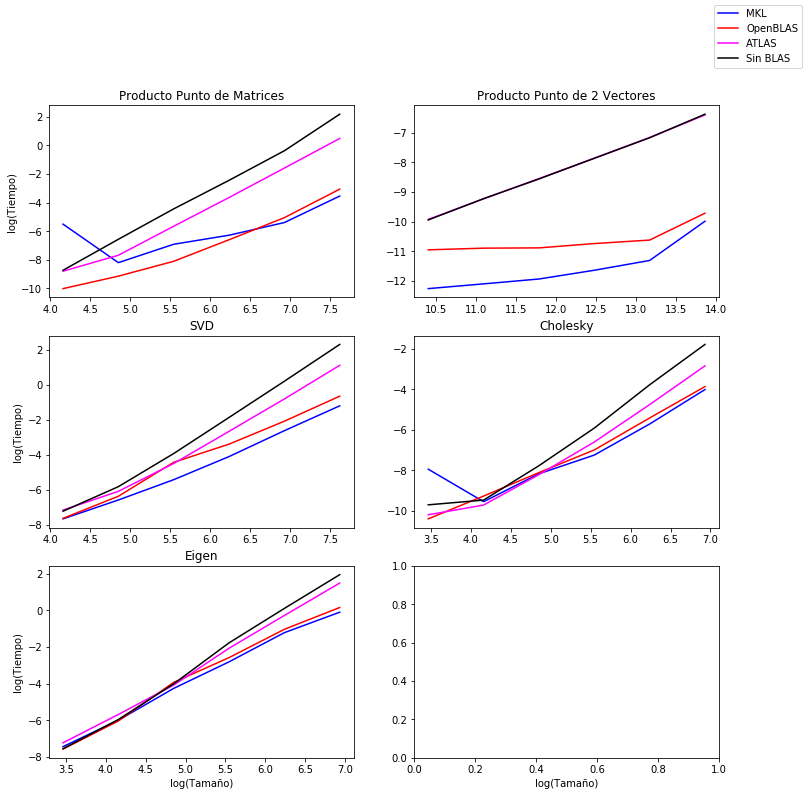

In [235]:
%matplotlib inline
from matplotlib import pyplot as plt

fig, axs = plt.subplots(3, 2, sharex=False, sharey=False)
fig.set_size_inches(12, 12)
## Pruebas con MKL
df2 = df[df.Operación == 'Producto Punto de Matrices']
axs[0, 0].set_title(df2.Operación[0])
axs[0, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="blue", label="MKL")
df2 = df[df.Operación == 'Producto Punto de 2 Vectores']
axs[0, 1].set_title(df2.iloc[0,2])
axs[0, 1].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="blue", label="MKL")
df2 = df[df.Operación == 'SVD']
axs[1, 0].set_title(df2.iloc[0,2])
axs[1, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="blue", label="MKL")
df2 = df[df.Operación == 'Cholesky']
axs[1, 1].set_title(df2.iloc[0,2])
axs[1, 1].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="blue", label="MKL")
df2 = df[df.Operación == 'Eigen']
axs[2, 0].set_title(df2.iloc[0,2])
axs[2, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="blue", label="MKL")
# Etiquetas
axs[0, 0].set_ylabel('log(Tiempo)')
axs[1, 0].set_ylabel('log(Tiempo)')
axs[2, 0].set_ylabel('log(Tiempo)')
axs[2, 0].set_xlabel('log(Tamaño)')
axs[2, 1].set_xlabel('log(Tamaño)')
## Pruebas con OpenBLAS
df_blas = pd.read_csv("compare.openblas.csv")
df2 = df_blas[df_blas.Operación == 'Producto Punto de Matrices']
axs[0, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="red", label="OpenBLAS")
df2 = df_blas[df_blas.Operación == 'Producto Punto de 2 Vectores']
axs[0, 1].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="red", label="OpenBLAS")
df2 = df_blas[df_blas.Operación == 'SVD']
axs[1, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="red", label="OpenBLAS")
df2 = df_blas[df_blas.Operación == 'Cholesky']
axs[1, 1].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="red", label="OpenBLAS")
df2 = df_blas[df_blas.Operación == 'Eigen']
axs[2, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="red", label="OpenBLAS")
## Pruebas con ATLAS
df_atlas = pd.read_csv("compare.f77blas.csv")
df2 = df_atlas[df_atlas.Operación == 'Producto Punto de Matrices']
axs[0, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="magenta", label="ATLAS")
df2 = df_atlas[df_atlas.Operación == 'Producto Punto de 2 Vectores']
axs[0, 1].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="magenta", label="ATLAS")
df2 = df_atlas[df_atlas.Operación == 'SVD']
axs[1, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="magenta", label="ATLAS")
df2 = df_atlas[df_atlas.Operación == 'Cholesky']
axs[1, 1].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="magenta", label="ATLAS")
df2 = df_atlas[df_atlas.Operación == 'Eigen']
axs[2, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="magenta", label="ATLAS")
## Pruebas sin OpenBLAS
df_noblas = pd.read_csv("compare.noblas.csv")
df2 = df_noblas[df_noblas.Operación == 'Producto Punto de Matrices']
axs[0, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="black", label="Sin BLAS")
df2 = df_noblas[df_noblas.Operación == 'Producto Punto de 2 Vectores']
axs[0, 1].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="black", label="Sin BLAS")
df2 = df_noblas[df_noblas.Operación == 'SVD']
axs[1, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="black", label="Sin BLAS")
df2 = df_noblas[df_noblas.Operación == 'Cholesky']
axs[1, 1].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="black", label="Sin BLAS")
df2 = df_noblas[df_noblas.Operación == 'Eigen']
axs[2, 0].plot(np.log(df2.Tamaño), np.log(df2.Tiempo), color="black", label="Sin BLAS")
fig.legend()
plt.savefig("plot.png")
plt.show()